In [1]:
from fik import *
from os import path
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
logs_dir = '/storage/experiments/2019/09_HEMERA/FLIGHT'

gm_logs, cf_logs, ff_logs = [
    DATALOG.split_runs(path.join(logs_dir, devid, 'DATALOG.TXT'))
    for devid in ['GM', 'CF', 'FF']
]

No fix for run of 11740 lines at $AIRDOS,FF,96051b4,1290c00806a200920856a000a00000c9


/nix/store/hqvzaq1k1bdqz4d0bcgbfylj1aiqq0k9-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


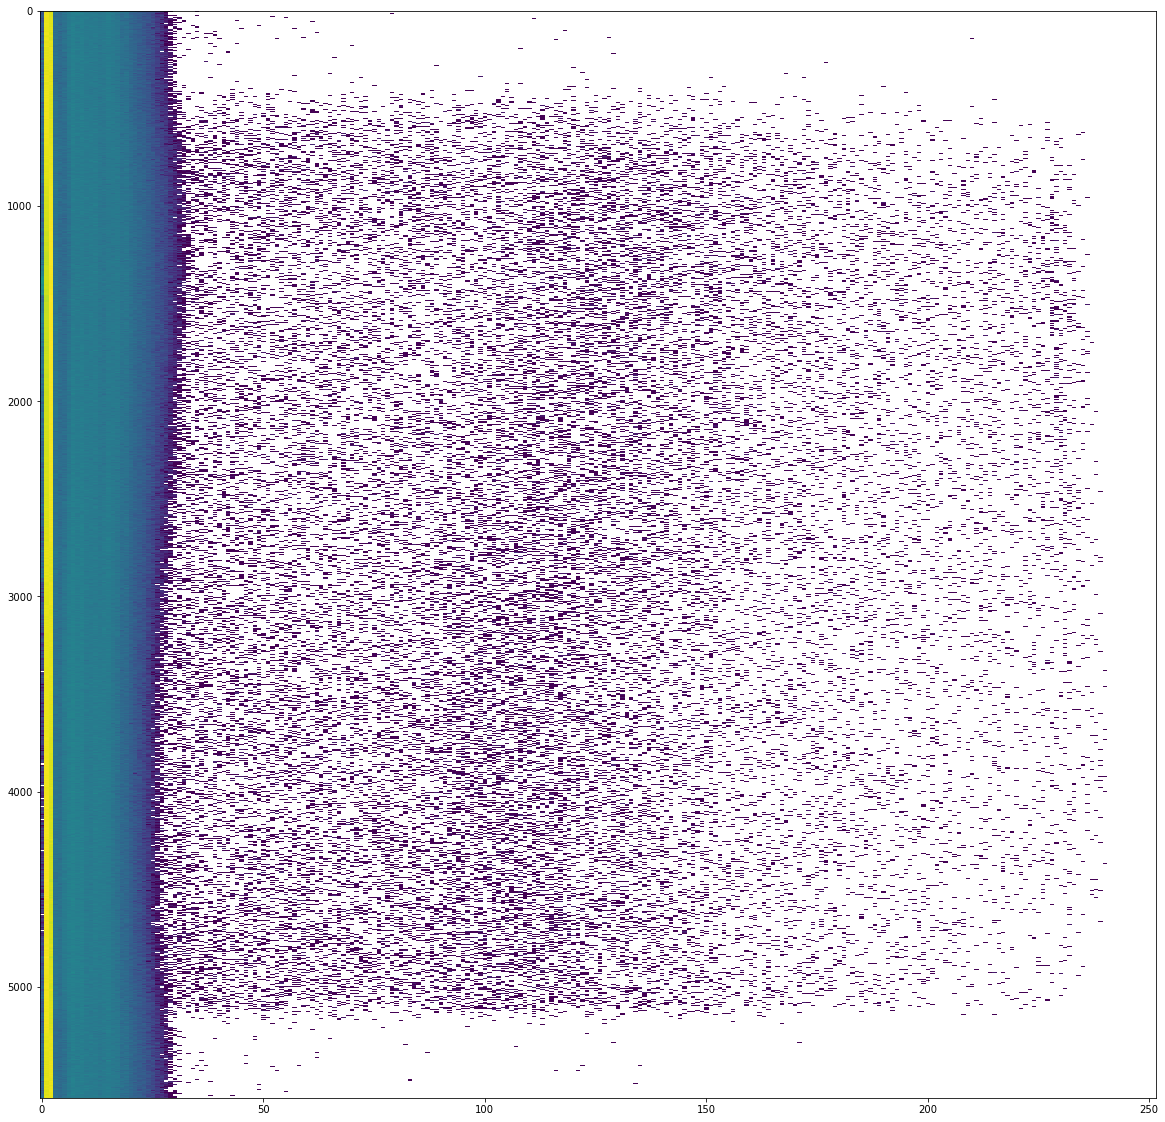

In [3]:
# c_all is pandas frame, c_all['Bins'] contains logged spectra, each spectrum being an ordinary python list
c_all = cf_logs[0].candy

# select time range of interest
ta = pd.Timestamp('2019-09-05T04', tz='UTC')
tb = pd.Timestamp('2019-09-05T18:30', tz='UTC')
c = c_all[(c_all.index > ta) & (c_all.index < tb)]

# export spectra into a numpy array
spectra = np.array(list(c['Bins']))

plt.figure(figsize=(20, 20))
plt.imshow(np.log(spectra), aspect='auto')

In [4]:
# first axis is spectrum number, second axis is no. of bin in a spectrum
# for example, to select 0th to 30th bin in spectrum no. 100
spectra[100,0:30]

array([   11, 33313, 30761,    44,    43,    70,    88,    97,    97,
         101,    81,    83,    82,    74,    71,    94,    70,    80,
          55,    59,    39,    36,    20,    22,    16,    13,     7,
           3,     4,     0])

In [5]:
# ALTERNATIVE: bins directly as pandas columns
pd.DataFrame(list(c['Bins']), index=c.index)

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
Time,,,,,,,,,,,,,,,,,,,,,
2019-09-05 04:00:01+00:00,43,39247,24735,52,50,46,94,104,110,112,...,0,0,0,0,0,0,0,0,0,0
2019-09-05 04:00:10+00:00,33,39302,24834,48,57,56,78,84,98,90,...,0,0,0,0,0,0,0,0,0,0
2019-09-05 04:00:19+00:00,41,38867,25205,57,55,51,78,104,110,94,...,0,0,0,0,0,0,0,0,0,0
2019-09-05 04:00:28+00:00,35,39584,24412,65,34,57,80,123,93,93,...,0,0,0,0,0,0,0,0,0,0
2019-09-05 04:00:36+00:00,16,36936,27185,53,44,46,81,100,100,90,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-05 18:29:21+00:00,46,33164,30907,43,40,60,83,114,72,105,...,0,0,0,0,0,0,0,0,0,0
2019-09-05 18:29:30+00:00,40,32237,31776,59,67,54,86,115,91,98,...,0,0,0,0,0,0,0,0,0,0
2019-09-05 18:29:41+00:00,39,31694,32337,61,48,63,76,94,86,97,...,0,0,0,0,0,0,0,0,0,0
